#Spike data visualizations of 20 all-to-all connected excitory oscillators


Author Henrik Horst, Supervisor Maximiliane Noll

16.05.2022

In [ ]:
#only necessary in gdrive - skip if not using colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#check current working directory and change to the appropriate directory
!pwd
%cd "/content/drive/MyDrive/EdgeOfChaos"

/content/drive/My Drive/EdgeOfChaos
/content/drive/MyDrive/EdgeOfChaos


In [ ]:
#required for data fitting to a powerlaw
!pip install powerlaw
!pip install mpmath

In [ ]:
#import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

 

# Set the random seed for data generation (just for test cases)

np.random.seed(42)

# Set spike threshold (above this value the output value of an oscillator is considered a spike)
th=1

First let's define a function to extract the spikes from the simulation data

In [ ]:
def get_spikes(arr,th=th, rise=True):
  '''
    Function for extracting spikes from a block of the oscillators output 
    voltage values given the spiking threshold.
    Parameters:
        arr: array of voltage values, each column corresponds to one oscillator, a numpy array
        th: threshold value above which the output voltage is considered to be a spike, a scalar
        rise: For True get the time value where voltage goes above the threshold(beginning of the spike) and for False where the voltage
              goes below the threshold (end of spike)
    Returns:
        an array to filter the arr or any other corresponding array for the extracted values
        (think of this as an indexing block which gives you just the values which we want by the operation specified in this function)
  '''
  NST = np.diff(np.sign(arr-th),axis=0) 
  #print(NST)
  if rise==True:
    NST = np.where(NST>1)
  if rise==False:
    NST = np.where(NST<-1)
  #print(NST)
  return NST

#### Test case for function get_spikes

Click below to see the code.

In [ ]:
# test case for function get_spikes
test_arr= np.array([[0],[4],[0],[0],[5],[0]])
print(test_arr)
time=np.array([[0],[1],[2],[3],[4],[5]])
x=get_spikes(test_arr,rise=False)
print(time[x])

[[0]
 [4]
 [0]
 [0]
 [5]
 [0]]
[1 4]


##Load data

In [ ]:
#read in data from LTSpice into pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/EdgeOfChaos/data/fireflys1.txt', delimiter = "\t")

In [ ]:
df.head()

,time,V(l1),V(l2),V(l3),V(l4),V(l5),V(l6),V(l7),V(l8),V(l9),...,V(r1),V(r2),V(r3),V(r4),V(r5),V(r6),V(r7),V(r8),V(r9),V(r10)
0,0.000000,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
1,0.000030,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,...,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003
2,0.000090,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
3,0.000451,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002
4,0.000931,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,...,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001


In [ ]:
#extract values from the dataframe
spike_data=df.iloc[:,1:].values #now data in numpy array format
print(spike_data.shape)
spike_data=np.concatenate((np.zeros((1,20)), spike_data), axis=0) #this is due to the np.diff in the get_spikes function which
#takes the difference of two values, so to consider also the first value on its own we have to add a zero in front, this is also
#necessary to not induce a time shift in the filtered time array with the reurn value from get_spike()
print(spike_data.shape)
time=df.iloc[:,0].values

(225047, 20)
(225048, 20)


#### Evaluate time array

Click below to see the code.

In [ ]:
np.min(np.diff(time))

7.009397506863024e-09

In [ ]:
np.max(np.diff(time))

0.087890625

In [ ]:
np.mean(np.diff(time))

0.00039991379540182893

As we see the time was not sampled uniform but is quite distributed around the mean(compare mean value with min and max value)

##Assemble the data

In [ ]:
number_of_oscillators=spike_data.shape[1]

In [ ]:
#write spike times in form of different lengths numpy arrays into one list with each entry the spikes of one oscillator
all_spike_start_times=[]
for i in range(number_of_oscillators):
  all_spike_start_times.append(time[get_spikes(spike_data[:,i])])



Spike raster plot for visualization

'\nSo which number in the plot below corresponds to which oscillator in the LTSpice file?\nIn the LTSpice data file the 20 oscillator are divided into a left and right bank\n0-9 corresponds to oscillators in the left bank from top to bottom ... 0==L1, 1==L2..\n10-19 corresponds to oscillators in the right bank from top to bottom ... 10==R1, 11==R2..\n'

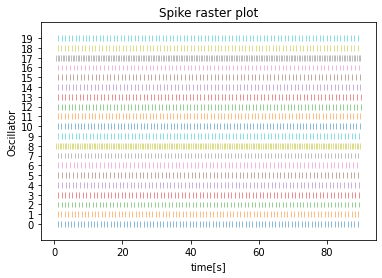

In [ ]:
#This is the final plotting step :)

# Set neural data
neuralData = all_spike_start_times
#print(neuralData)
 


# Set spike colors for each neuron
colorCodes = ('tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray',
'tab:olive','tab:cyan','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray',
'tab:olive','tab:cyan')                    

                                    

# Draw a spike raster plot
fig, ax = plt.subplots()
ax.eventplot(neuralData, color=colorCodes, lineoffsets=1, linewidths=0.5, linelengths = 0.6)     

ax.set_yticks(np.arange(20))

# Provide the title for the spike raster plot

plt.title('Spike raster plot')

# Give x axis label for the spike raster plot

plt.xlabel('time[s]')

# Give y axis label for the spike raster plot

plt.ylabel('Oscillator')

#plt.show

'''
So which number in the plot below corresponds to which oscillator in the LTSpice file?
In the LTSpice data file the 20 oscillator are divided into a left and right bank
0-9 corresponds to oscillators in the left bank from top to bottom ... 0==L1, 1==L2..
10-19 corresponds to oscillators in the right bank from top to bottom ... 10==R1, 11==R2..
'''

#### Eventplot sample case

Play around with eventplots for understanding and testing (just included for programming convenience that you can quickly test something out about eventplots without the "complicated" neural data)

Click below to see the code.

Text(0, 0.5, 'Neuron')

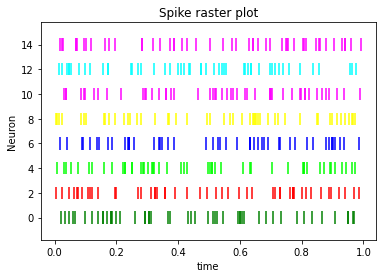

In [ ]:
# Create rows of random data with 50 data points simulating rows of spike trains

test_data = np.random.random([8, 50])

 

# Set different colors for each neuron

colorCodes = np.array([[0, 0.5, 0],

                        [1, 0, 0],

                        [0, 1, 0],

                        [0, 0, 1],

                        [1, 1, 0],

                        [1, 0, 1],

                        [0, 1, 1],

                        [1, 0, 1]])

                  

# Set spike line for each neuron

#lineSize = [0.4, 0.3, 0.2, 0.8, 0.5, 0.6, 0.7, 0.9]                                  

        

# Draw a spike raster plot

plt.eventplot(test_data, color=colorCodes, lineoffsets=2)#, linelengths = lineSize)     

 

# Provide the title for the spike raster plot

plt.title('Spike raster plot')

 

# Give x axis label for the spike raster plot

plt.xlabel('time')

 

# Give y axis label for the spike raster plot

plt.ylabel('Neuron')


#Spike animation

In [ ]:
from matplotlib.animation import FuncAnimation
from matplotlib import rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

#### Simple test case animation

Play around with array animation for understanding and testing (just included for programming convenience that you can quickly test something out about array animation without always animating with the "complicated" neural data)

Click below to see the code.

int64


Text(0.5, 1.0, 'Plot 2D array')

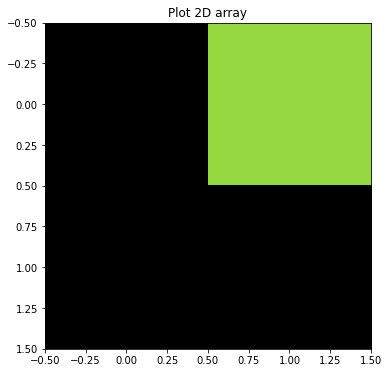

In [ ]:
X=np.zeros((2,2,3), dtype=int)
X[0,1,1]=216
X[0,1,0]=149
X[0,1,2]=64
print(X[0,1,2].dtype)
#95D840FF
fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("Plot 2D array")

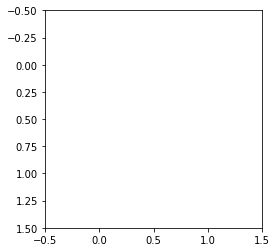

In [ ]:
X=np.ones((2,2,3), dtype=int)*255
  
fig, axes = plt.subplots()
axes.set_axis_off()
def animation_function(i):
    axes.clear()
    
    r=random.randint(0,1)
    if r==0:
      X[0,1,1]=255
      X[0,1,0]=255
      X[0,1,2]=255


    else:
      X[0,1,1]=216
      X[0,1,0]=149
      X[0,1,2]=64
    axes.imshow(X)
  
  
ani = FuncAnimation(fig, func = animation_function,interval = 50)

In [ ]:
ani

##Spike Fireflys 20 Animation

In [ ]:
#write spike end times in form of different lengths numpy arrays into one list with each entry the end of spikes of one oscillator
all_spike_end_times=[]
for i in range(20):
  all_spike_end_times.append(time[get_spikes(spike_data[:,i],rise=False)])
##this code cell is not used later

In [ ]:
#set interval time in seconds (this is how long it will last until the animation renders the next image)
interval_in_s=0.05
#create spike data array for the animation
spike_ani_array=np.zeros((20,int(90/interval_in_s)+1))
spikes=np.zeros((20,int(90/interval_in_s)+1))
spike_ani_array.shape

(20, 1801)

In [ ]:
'''
the concept is to have an array of length n*interval+1=simulation time in LTSpice(currently 90s => 90s/0.05s=1800 + 1)
and then to map each spike to the closest index (e.g. a spike at time 0.051 seconds would be mapped to index 1 corresponding to 0.05s)
Hence we went from a not equidistant time array from our LTSpice data to an equidistant array necessary for animation in python since the interval
time has to be constant for animation. To ensure visibility of the spike also the next two indexes of the array a set to 1 (so that the spike is not
just a 50ms blink). Then the following array index is set to -1 so that the program can know when to stop displaying the spike.
'''
for i in range(number_of_oscillators):
  for j in range(len(all_spike_start_times[i])):
    index=int(np.round(all_spike_start_times[i][j]/0.05))
    spike_ani_array[i,index]=1
  for n in range(spike_ani_array.shape[1]):
    if spike_ani_array[i,n]==1:
      spikes[i,n]=1
      try:
         spikes[i,n+1]=1
      except:
        pass
      try:
         spikes[i,n+2]=1
      except:
        pass
      try:
         spikes[i,n+3]=-1
      except:
        pass
  

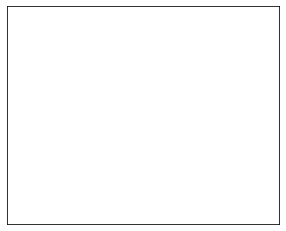

In [ ]:
spike_plt_arr= np.ones((4,5,3), dtype=int)*255
fig, axes = plt.subplots()
  
def spike_animation(i):
    axes.clear()
    axes.tick_params(
                left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

    for j in range(20):

      if spikes[j,i]==-1:
        spike_plt_arr[j//5,j%5,1]=255
        spike_plt_arr[j//5,j%5,0]=255
        spike_plt_arr[j//5,j%5,2]=255


      elif spikes[j,i]==1:
        spike_plt_arr[j//5,j%5,1]=216
        spike_plt_arr[j//5,j%5,0]=149
        spike_plt_arr[j//5,j%5,2]=64
    axes.imshow(spike_plt_arr)
  
playback_speed=0.5
spike_animation = FuncAnimation(fig, func = spike_animation,frames= int(spikes.shape[1]), interval = 1000*interval_in_s/playback_speed)

In [ ]:
#uncomment line below to create animation -> takes some minutes
#spike_animation

# Power law fitting

The spatial pattern of active electrodes on the multielectrode array during one time bin $Δ$t was called a frame and a
sequence of consecutively active frames that was preceded by a
blank frame and ended by a blank frame was called an avalanche.

This is an excerpt from the paper "Neuronal Avalanches in Neocortical Circuits" by John M. Beggs and Dietmar Plenz published in The Journal of Neuroscience, December 3, 2003. In our case the active electrodes corresponds to active spiking oscillators and the multielectrode array correponds to our oscillators circuit

In [ ]:
#set frame duration -> in the paper this ranged from 1 to 16ms
frame_duration=0.003 #50ms
frames = np.linspace(0,90,int(90/frame_duration)+1)
len(frames)

30001

In [ ]:
#test the binning function
#np.digitize(all_spike_start_times[0],frames)

In [ ]:
spiking_neurons_per_frame=np.zeros(len(frames))
for i in range(len(all_spike_start_times)):
  for j in np.digitize(all_spike_start_times[i],frames):
    spiking_neurons_per_frame[j-1]+=1


In [ ]:
#spiking_neurons_per_frame[:30]

Create avalanche sizes from frames computed above and according to the definition given at the beginning of the section

In [ ]:
avalanche_sizes=[]
curr_avalanche=False
for elem in spiking_neurons_per_frame:
  if elem>0:
    if curr_avalanche==False:
      avalanche_sizes.append(elem)
      curr_avalanche=True
    else:
      avalanche_sizes[-1]+=elem
    

  else:
    curr_avalanche=False



In [ ]:
len(avalanche_sizes)

742

Finally, the power law fitting and comparision to other fitting modalities

Calculating best minimal value for power law fit
2.205026820127037
2.0
R: -0.41844972780337786, p: 0.6756183351520959


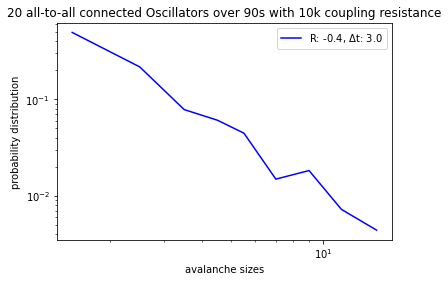

In [ ]:
import powerlaw

results = powerlaw.Fit(avalanche_sizes, discrete=True)
print(results.power_law.alpha)
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)#'truncated_power_law', 'lognormal'
print(f"R: {R}, p: {p}")
'''
R is the loglikelihood ratio between the two candidate distributions. This number will be positive
if the data is more likely in the first distribution, and negative if the data is more likely in the second
distribution. The significance value for that direction is p. The normalized_ratio option normalizes R
by its standard deviation, R/(σ√n). The normalized ratio is what is directly used to calculate p.
The exponential distribution is the absolute minimum alternative candidate for evaluating the heavy-
tailedness of the distribution. The reason is definitional: the typical quantitative definition of a ”heavy-
tail” is that it is not exponentially bounded. Thus if a power law is not a better fit than an
exponential distribution (as in the above example) there is scarce ground for considering the distribution
to be heavy-tailed at all, let alone a power law.
However, the exponential distribution is, again, only the minimum alternative candidate distribu-
tion to consider when describing a probability distribution.
'''
powerlaw.plot_pdf(avalanche_sizes, color='b', label=f'R: {R:.1f}, $Δ$t: {1000*frame_duration}')
plt.legend()
plt.xlabel('avalanche sizes')
plt.ylabel('probability distribution')
plt.title('20 all-to-all connected Oscillators over 90s with 10k coupling resistance')
plt.savefig(f'outputs/fireflies20_powerlaw_10k_{1000*frame_duration}ms.png')

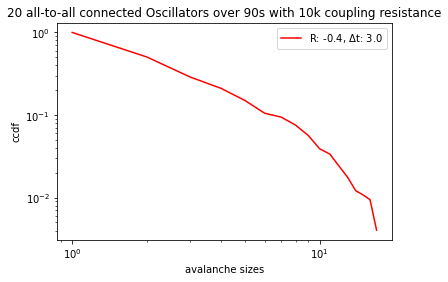

In [ ]:
powerlaw.plot_ccdf(avalanche_sizes, color='r', label=f'R: {R:.1f}, $Δ$t: {1000*frame_duration}')
plt.legend()
plt.xlabel('avalanche sizes')
plt.ylabel('ccdf')
plt.title('20 all-to-all connected Oscillators over 90s with 10k coupling resistance')
plt.savefig(f'outputs/fireflies20_ccdf_10k_{1000*frame_duration}ms.png')

Calculating best minimal value for power law fit
5.581233650196624
3.0
R: -0.9980001360853863, p: 0.3182792926541742
Calculating best minimal value for power law fit
4.3860157025452216
2.0
R: -4.007732494867051, p: 6.130450091579759e-05
Calculating best minimal value for power law fit
2.4179116279012822
1.0
R: -36.04904998471097, p: 1.427213747158684e-284
Calculating best minimal value for power law fit
2.4389399783150725
1.0
R: -60.082067337523455, p: 0.0


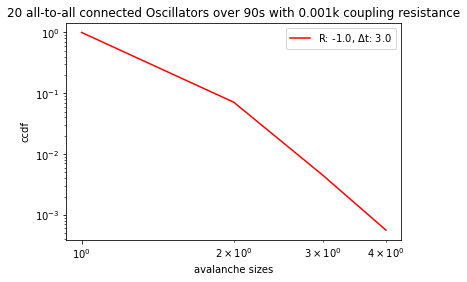

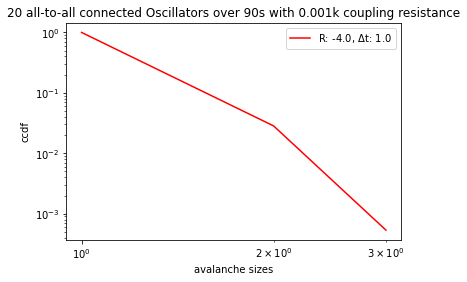

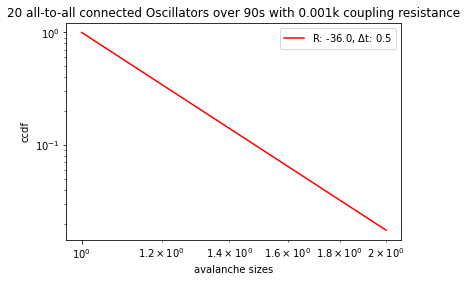

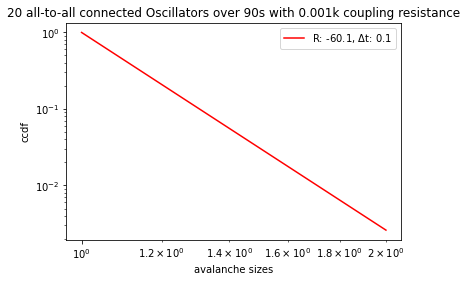

In [ ]:
#set frame duration -> in the paper this ranged from 1 to 16ms
frame_duration=[0.003,0.001,0.0005,0.0001]#50ms
for f in frame_duration:

  frames = np.linspace(0,90,int(90/f)+1)

  spiking_neurons_per_frame=np.zeros(len(frames))
  for i in range(len(all_spike_start_times)):
    for j in np.digitize(all_spike_start_times[i],frames):
      spiking_neurons_per_frame[j-1]+=1

  avalanche_sizes=[]
  curr_avalanche=False
  for elem in spiking_neurons_per_frame:
    if elem>0:
      if curr_avalanche==False:
        avalanche_sizes.append(elem)
        curr_avalanche=True
      else:
        avalanche_sizes[-1]+=elem
    

    else:
      curr_avalanche=False

  import powerlaw

  results = powerlaw.Fit(avalanche_sizes, discrete=True)
  print(results.power_law.alpha)
  print(results.power_law.xmin)
  R, p = results.distribution_compare('power_law', 'exponential', normalized_ratio=True)#'truncated_power_law', 'lognormal'
  print(f"R: {R}, p: {p}")

  plt.figure()
  powerlaw.plot_ccdf(avalanche_sizes, color='r', label=f'R: {R:.1f}, $Δ$t: {1000*f}')
  plt.legend()
  plt.xlabel('avalanche sizes')
  plt.ylabel('ccdf')
  plt.title('20 all-to-all connected Oscillators over 90s with 0.001k coupling resistance')
  plt.savefig(f'outputs/fireflies20_ccdf_1_{1000*f}ms.png')